In [2]:
#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml_cw2_helpers import *
# from iaml212cw2_my_helpers import *
from os import getcwd
print(getcwd())
#<----


c:\Users\Jason Hu\Desktop\IAML-CW2\templates


In [3]:
# Q1.1
# X is [A0, A1, ..., A8] Y is 0 or 1
X, Y = load_Q1_dataset("../data/dataset_q1.csv")
# these are np arrays
print('X: ', X. shape, 'Y: ', Y. shape)
Xtrn = X[100:, :]
Ytrn = Y[100:]  # training data set
Xtst = X[0:100, :]
Ytst = Y[0:100]  # test data set


X:  (800, 9) Y:  (800,)


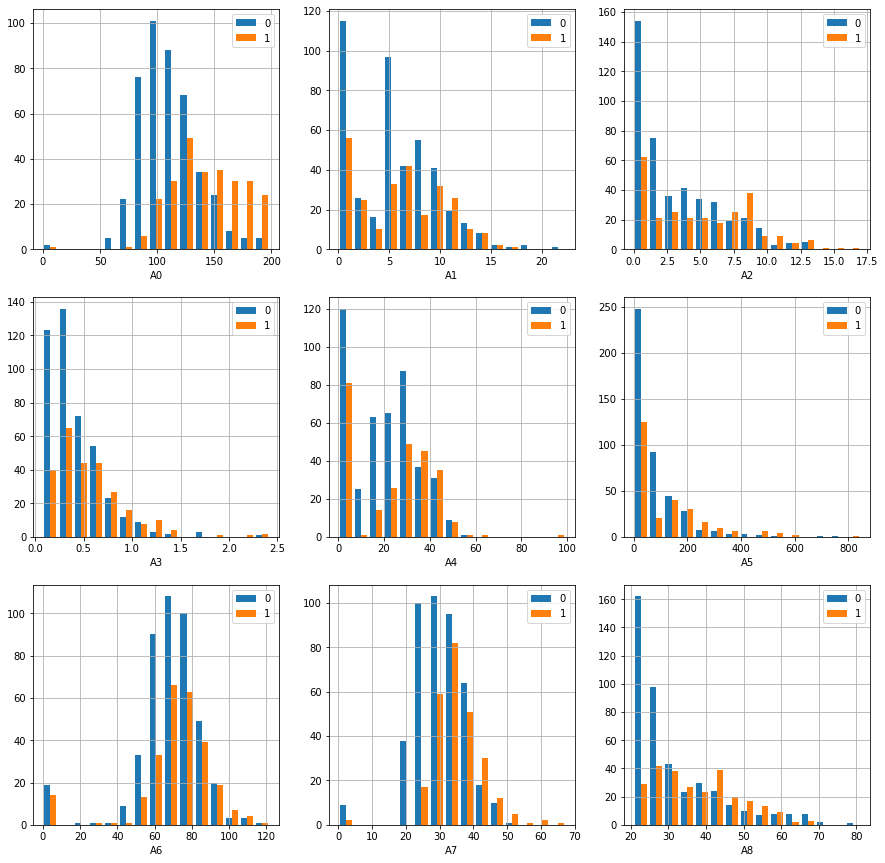

In [4]:
# see how each feature in Xtrn is distributed for each class. Since there
# are nine attributes, we plot a total of nine figures in a 3-by-3 grid, where the top-left figure shows
# the histograms for attribute ’A0’ and the bottom-right ’A8’
# In each figure, you show histograms of instances of class 0 and those of class 1 using pyplot.hist

fig, axs = plt.subplots(3, 3, figsize=(15,15))
mask_Y0, mask_Y1 = Ytrn==0, Ytrn==1  # instances where label is 0 or is 1
instances_0, instances_1 = Xtrn[mask_Y0], Xtrn[mask_Y1]
for row in range(3):
    for column in range(3):
        index = row * 3 + column  # featrue index in Xtrn
        Xa, Xb = instances_0[:, index], instances_1[:, index]
        # print(Xa.shape, Xb.shape)
        ax = axs[row][column]
        ax.hist((Xa, Xb), bins=15)
        ax.set_xlabel("A" + str(index))
        ax.grid()
        ax.legend(['0', '1'])

plt.show()


In [5]:
# Q1.2
# Calculate the correlation coefficient between each attribute of Xtrn and the label Ytrn

# param to_compute: each row a variable, column an observation.
to_compute = Xtrn.T  # shape(9,700)
coeffs = []
for attr in to_compute:
    coeffs.append(np.corrcoef([attr,Ytrn]))
coeffs


[array([[1.       , 0.4911759],
        [0.4911759, 1.       ]]),
 array([[1.       , 0.0874059],
        [0.0874059, 1.       ]]),
 array([[1.        , 0.22728719],
        [0.22728719, 1.        ]]),
 array([[1.        , 0.20736605],
        [0.20736605, 1.        ]]),
 array([[1.        , 0.10772035],
        [0.10772035, 1.        ]]),
 array([[1.       , 0.1856714],
        [0.1856714, 1.       ]]),
 array([[1.        , 0.07626074],
        [0.07626074, 1.        ]]),
 array([[1.        , 0.30445377],
        [0.30445377, 1.        ]]),
 array([[1.        , 0.24034733],
        [0.24034733, 1.        ]])]

In [6]:
# Q1.4 (a)
# Calculate the unbiased sample variance of each attribute of Xtrn, and sort the variances in decreasing order

# use tuple of (attr_name, variance), will need attr's name when plotting
variances = []
for i in range(Xtrn.T.shape[0]):
    attr = Xtrn.T[i]
    variances.append(('A'+str(i), np.var(attr, ddof=1)))  # unbiased
variances = sorted(variances, reverse=True, key=lambda v: v[1])
print(variances)
print('sum of variances:', sum(map(lambda v: v[1], variances)))

[('A5', 14769.0983163317), ('A0', 1006.4338305628447), ('A6', 384.4417023511138), ('A4', 254.1050424860004), ('A8', 139.6276958847333), ('A7', 63.50469851134274), ('A1', 16.72342727243), ('A2', 11.595970953402821), ('A3', 0.10591536868996523)]
sum of variances: 16645.63659972226


Text(0, 0.5, 'cumulative variance ratio')

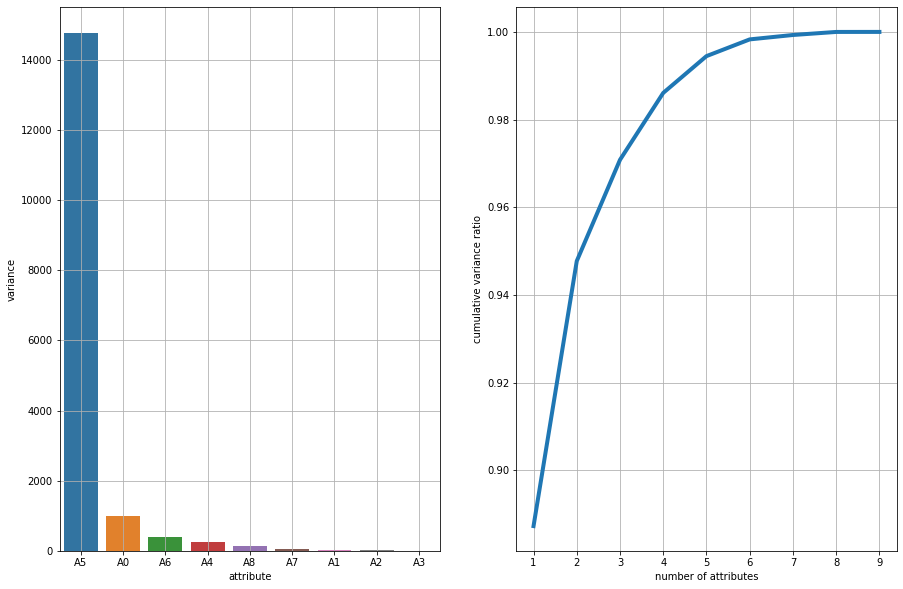

In [99]:
# Q.1.4(b)
# Plot the following two graphs side-by-side. Use grid lines in each plot.

# 1) amount of variance explained by each of the (sorted) attributes, indicate attribute numbers on the x-axis.
# 2) cumulative variance ratio against the number of attributes, where the range of y-axis should be[0, 1].

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
variances = np.array(variances)

data1 = pd.DataFrame({'attribute': variances[:, 0], 'variance': variances[:, 1]})
data1['variance'] = pd.to_numeric(data1['variance'])
sns.barplot(data=data1, x='attribute', y='variance', ax=ax1)
ax1.grid()

data2 = {'num_of_attr': list(range(1,10)), 'variance': []}
var_total = 0
for variance in data1['variance']:
    var_total += variance
    data2['variance'].append(var_total)
data2['variance'] = np.array(data2['variance']) / var_total
sns.lineplot(data=data2, x='num_of_attr', y='variance', ax=ax2, linewidth=4)
ax2.grid()
ax2.set_xlabel('number of attributes')
ax2.set_ylabel('cumulative variance ratio')

In [53]:
# Q1.5
# Apply Principal Component Analysis (PCA) to Xtrn, where you should not rescale Xtrn. Use Sklearn’s PCA with default parameters, i.e. specifying no parameters

from sklearn.decomposition import PCA
pca = PCA()

In [98]:
# Q1.5 (a)
# Report the total amount of unbiased sample variance explained by the whole set of principal components.
X_pca = pca.fit_transform(Xtrn)
pca.explained_variance_
#sum(pca.explained_variance_)

array([1.49702110e+04, 8.99436290e+02, 3.95950144e+02, 1.95445496e+02,
       1.13933299e+02, 4.62311360e+01, 1.65302042e+01, 7.80013781e+00,
       9.88659957e-02])

Text(0, 0.5, 'cumulative variance ratio')

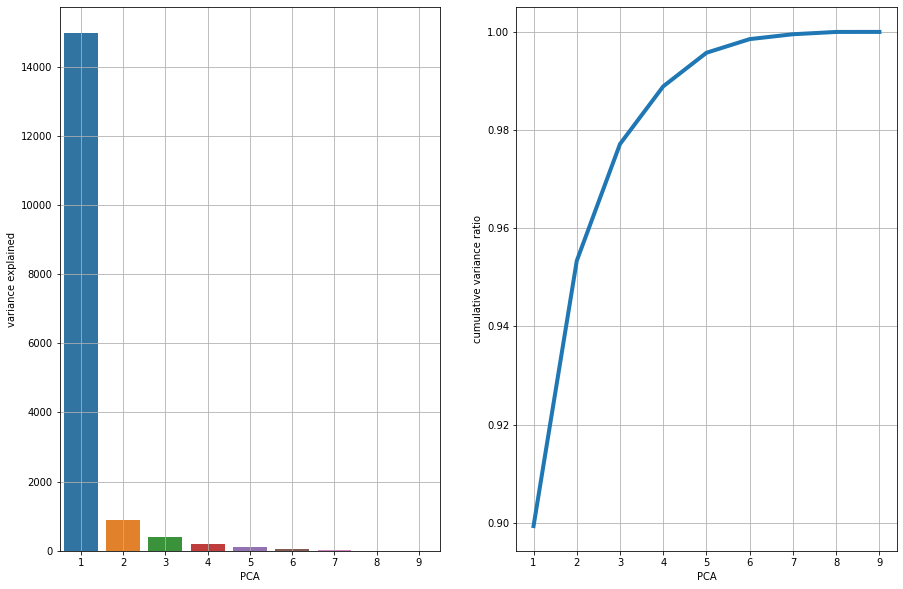

In [64]:
# Q1.5 (b)
# A graph of the amount of variance explained by each of the principal components.
# A graph of the cumulative variance ratio, where the range of y-axis should be[0, 1].

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,10))
data1 = {'component number': list(range(1,len(pca.explained_variance_)+1)), 'variance': pca.explained_variance_}
sns.barplot(ax=ax1, data=data1, x='component number', y='variance', lw=4)
ax1.grid()
ax1.set_xlabel('PCA')
ax1.set_ylabel('variance explained')

data2 = {'component number': list(range(1,len(pca.explained_variance_ratio_)+1)), 'cumulative': []}
var_total = 0
for variance in data1['variance']:
    var_total += variance
    data2['cumulative'].append(var_total)
data2['cumulative'] = np.array(data2['cumulative']) / var_total

sns.lineplot(data=data2, x='component number', y='cumulative', ax=ax2, linewidth=4)
ax2.grid()
ax2.set_xlabel('PCA')
ax2.set_ylabel('cumulative variance ratio')


Text(0.5, 1.0, 'Xtrn instances mapped onto 2d space (x is 1st component y is 2nd)')

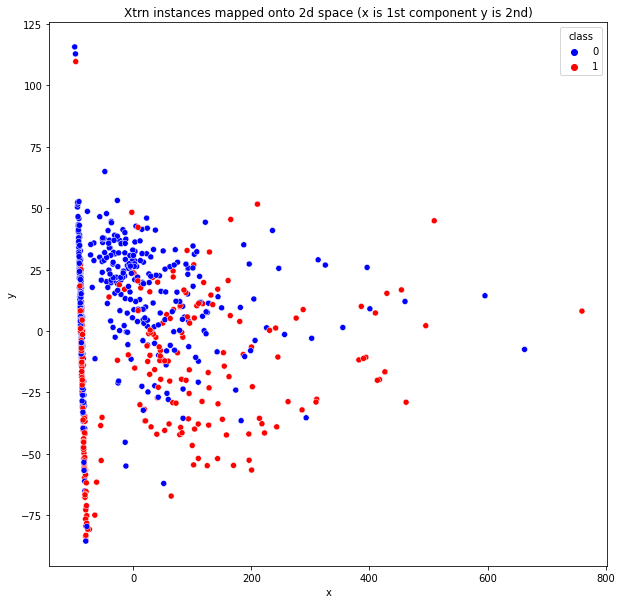

In [81]:
# Q1.5 c
# Mapping all the instances in Xtrn on to the 2D space spanned with the first two principal components, and plot a scatter graph of the instances on the space,
# where instances of class 0 are displayed in blue and those of class 1 in red. Use grid lines.
# Note that the mapping should be done directly using the eigen vectors obtained in PCA - you should not use Sklearn’s functions, e.g. transform().

X_pca2d = X_pca[:, 0:2]
data = {'x':X_pca2d[:,0],'y':X_pca2d[:,1],'class':Ytrn}
fig, ax=plt.subplots(figsize=(10,10))
sns.scatterplot(data=data,x='x',y='y', hue='class', palette=['blue','red'], ax=ax)
ax.set_title('Xtrn instances mapped onto 2d space (x is 1st component y is 2nd)')

In [85]:
# Q1.5 d
# Calculate the correlation coefficient between each attribute and each of the first and second principal components
all_coeffs = []
for component in X_pca2d.T:
    coeffs = []
    for attr in Xtrn.T:
        coeffs.append(np.corrcoef([attr, component]))
    all_coeffs.append(coeffs)
all_coeffs



[[array([[1.        , 0.38559301],
         [0.38559301, 1.        ]]),
  array([[ 1.        , -0.04582516],
         [-0.04582516,  1.        ]]),
  array([[ 1.        , -0.05705151],
         [-0.05705151,  1.        ]]),
  array([[1.        , 0.18579339],
         [0.18579339, 1.        ]]),
  array([[1.        , 0.45924022],
         [0.45924022, 1.        ]]),
  array([[1.        , 0.99967801],
         [0.99967801, 1.        ]]),
  array([[1.        , 0.10057182],
         [0.10057182, 1.        ]]),
  array([[1.       , 0.2323021],
         [0.2323021, 1.       ]]),
  array([[ 1.        , -0.00157407],
         [-0.00157407,  1.        ]])],
 [array([[ 1.        , -0.91428895],
         [-0.91428895,  1.        ]]),
  array([[ 1.        , -0.09077312],
         [-0.09077312,  1.        ]]),
  array([[ 1.        , -0.22546263],
         [-0.22546263,  1.        ]]),
  array([[ 1.        , -0.07987177],
         [-0.07987177,  1.        ]]),
  array([[1.        , 0.09716457],
    

In [86]:
# Q1.6
# Create the standardised training data Xtrn_s and test data Xtst_s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

In [92]:
# Q1.6
# answer the same questions in Q1.5
# a)
pca_s = PCA()
X_pca_s = pca_s.fit_transform(Xtrn_s)
pca_s.explained_variance_
sum(pca_s.explained_variance_)


9.01287553648068

Text(0, 0.5, 'cumulative variance ratio')

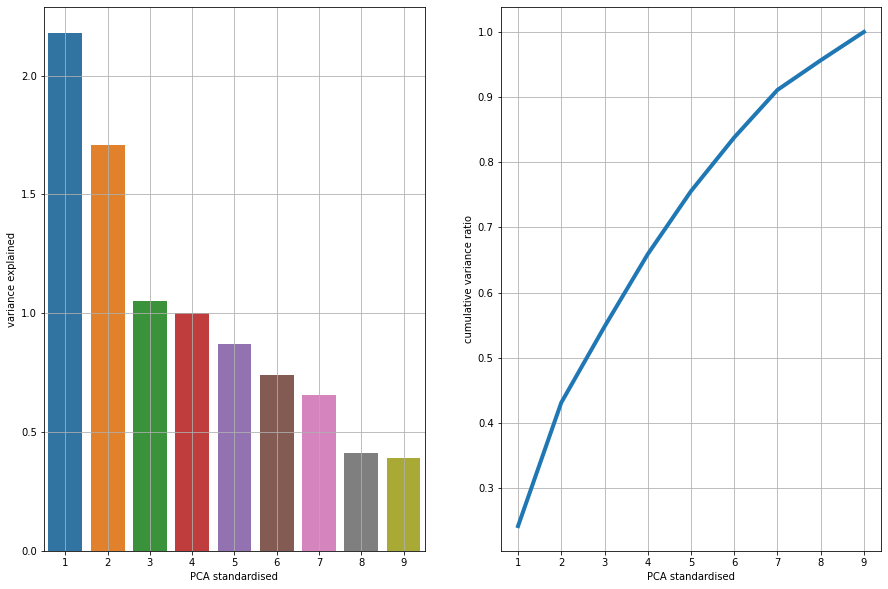

In [93]:
# b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
data1 = {'component number': list(range(1, len(pca_s.explained_variance_)+1)), 'variance': pca_s.explained_variance_}
sns.barplot(ax=ax1, data=data1, x='component number', y='variance', lw=4)
ax1.grid()
ax1.set_xlabel('PCA standardised')
ax1.set_ylabel('variance explained')

data2 = {'component number': list(range(1, len(pca_s.explained_variance_ratio_)+1)), 'cumulative': []}
var_total = 0
for variance in data1['variance']:
    var_total += variance
    data2['cumulative'].append(var_total)
data2['cumulative'] = np.array(data2['cumulative']) / var_total

sns.lineplot(data=data2, x='component number', y='cumulative', ax=ax2, linewidth=4)
ax2.grid()
ax2.set_xlabel('PCA standardised')
ax2.set_ylabel('cumulative variance ratio')


Text(0.5, 1.0, 'Xtrn_s instances mapped onto 2d space (x is 1st component y is 2nd, standardised)')

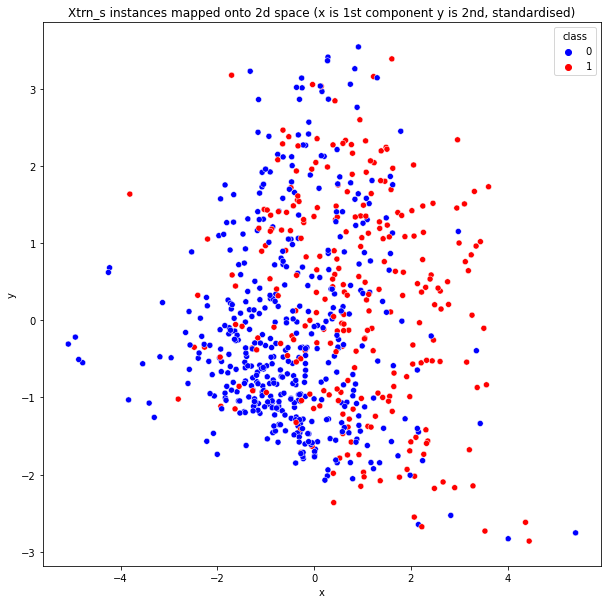

In [96]:
# Q1.6 (c)

X_pca2d_s = X_pca_s[:, 0:2]
data = {'x': X_pca2d_s[:, 0], 'y': X_pca2d_s[:, 1], 'class': Ytrn}
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='x', y='y', hue='class', palette=['blue', 'red'], ax=ax)
ax.set_title('Xtrn_s instances mapped onto 2d space (x is 1st component y is 2nd, standardised)')


In [97]:
# Q1.6 (d)
all_coeffs = []
for component in X_pca2d_s.T:
    coeffs = []
    for attr in Xtrn_s.T:
        coeffs.append(np.corrcoef([attr, component]))
    all_coeffs.append(coeffs)
all_coeffs


[[array([[1.        , 0.60067139],
         [0.60067139, 1.        ]]),
  array([[1.        , 0.05729591],
         [0.05729591, 1.        ]]),
  array([[1.        , 0.26795203],
         [0.26795203, 1.        ]]),
  array([[1.        , 0.36565547],
         [0.36565547, 1.        ]]),
  array([[1.        , 0.62303821],
         [0.62303821, 1.        ]]),
  array([[1.        , 0.62985685],
         [0.62985685, 1.        ]]),
  array([[1.        , 0.52285072],
         [0.52285072, 1.        ]]),
  array([[1.        , 0.65116074],
         [0.65116074, 1.        ]]),
  array([[1.        , 0.35286443],
         [0.35286443, 1.        ]])],
 [array([[1.        , 0.17743225],
         [0.17743225, 1.        ]]),
  array([[1.        , 0.10003686],
         [0.10003686, 1.        ]]),
  array([[1.        , 0.75998271],
         [0.75998271, 1.        ]]),
  array([[ 1.        , -0.20764337],
         [-0.20764337,  1.        ]]),
  array([[ 1.        , -0.46599042],
         [-0.46599042,

In [ ]:
# 1.8
# 5-fold, C for SVC in the range 0.01 to 100 - use 13 values spaced equally in log10 space
# run on Xtrn_s
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=5)
